# Final Project Report

* Class: DS5100
* Student Name: Angelo Orciuoli
* Student Net ID: qfu2ut
* This URL: https://github.com/angelorciuoli2/ds5100_project/blob/main/DS5100_ProjectReport.ipynb

# Instructions

Follow the instructions in the Final Project instructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Repo URL: https://github.com/angelorciuoli2/ds5100_project

### Die Module

```python
import numpy as np
import pandas as pd

class Die:
    """
    A Die object has N sides (faces) each with an associated weight.
    
    Faces can be strings or numbers, but must be unique.
    By default, each face is assigned an equal weight of 1.0, but weights can be changed.
    The die can be rolled to select a face based on its weights.
    
    Attributes:
        _die (pandas.DataFrame): Private DataFrame with faces as index and weights as a column.
    """
        
    def __init__(self, faces):
        """
        Initialize the Die with a given set of faces.
        
        Args:
            faces (numpy.ndarray): A 1D array of unique faces (strings or numbers).
        
        Raises:
            TypeError: If faces is not a NumPy array.
            ValueError: If faces are not unique.
        
        Behavior:
            - Assigns a default weight of 1.0 to each face.
            - Stores faces and weights in a private DataFrame.
        """
        # Check if faces is a NumPy array and values are unique
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be an array")

        if len(faces) != len(np.unique(faces)):
            raise ValueError("faces must contain distinct values")

        # Initialize faces, weights, and DataFrame
        self.faces = faces
        self.weights = np.ones(len(faces))  # Default weight is 1.0
        self._die_df = pd.DataFrame({
            'weights': self.weights
        }, index=self.faces)


    def change_weight(self, face, new_weight):
        """
        Change the weight of a specified face.
        
        Args:
            face (str or number): The face whose weight is to be changed.
            new_weight (int or float): The new weight for the face.
        
        Raises:
            IndexError: If the given face is not found in the die.
            TypeError: If the new weight is not a number or cannot be cast to a float.
        
        Behavior:
            - Updates the weight for the specified face in the internal DataFrame.
        """
        if face not in self.faces: # Check if face exists and weight is numeric (int or float)
            raise IndexError(f"Face {face} not found in the die.")

        if not isinstance(new_weight, (int, float)):
            raise TypeError("Weight must be a numeric value.")

        self._die_df.at[face, 'weights'] = new_weight # Update weight in DataFrame


    def roll(self, num_rolls=1):
        """
        Roll the die one or more times and return the outcomes.
        
        Args:
            num_rolls (int): Number of times to roll the die (default is 1).
        
        Returns:
            list: A list of outcomes corresponding to the faces rolled.
        
        Behavior:
            - Randomly selects faces with replacement based on weights.
            - Does not store the roll outcomes internally.
        """
        if not isinstance(num_rolls, int) or num_rolls < 1: # Check if die is rolled at least once
            raise ValueError("Number of rolls must be at least 1.")

        # Sample with replacement using weights
        results = np.random.choice(
            self._die_df.index, # the faces
            size=num_rolls, # number of rolls
            replace=True,
            p=self._die_df['weights'] / self._die_df['weights'].sum()  # normalize weights
        )

        return results.tolist()
    

    def show(self):
        """
        Show the current state of the die (faces and weights).
        
        Returns:
            pandas.DataFrame: A copy of the internal DataFrame with faces and their weights.
        """
        return self._die_df.copy()
```

### Game Module

```python
import pandas as pd
from .die import Die

class Game:
    """
    A Game object consists of rolling one or more similar dice (Die objects) one or more times and then saves result to DataFrame.
    
    'Similar dice' have the same number of sides and associated faces, though each die may have different weights.
    
    Attributes:
        _dice (list): A list of Die objects.
        _play_results (pandas.DataFrame): A private DataFrame storing the results of the most recent game play.
    """

    def __init__(self, dice):
        """
        Initialize the Game with a list of similar dice.
        
        Args:
            dice (list): A list of already-instantiated Die objects.
        
        Behavior:
            - Stores the list of dice for use in gameplay.
            - Validates that all dice are instances of Die.
            - Validates that all dice have the same faces (weights do not need to be the same).
        """
        # Check if input is Die objects list
        if not isinstance(dice, list) or not all(isinstance(die, Die) for die in dice): 
            raise TypeError("Input must be a list of Die objects.")

        # Check if dice have same number of faces and same face values
        reference_faces = list(dice[0].faces)  # Save first die's faces as reference
        for die in dice[1:]:
            if list(die.faces) != reference_faces:
                raise ValueError("All dice must have the same number and identical faces.")

        self.dice = dice
        self._play_results = None  # Store result


    def play(self, num_rolls=1):
        """
        Play the game by rolling all dice a specified number of times.
        
        Args:
            num_rolls (int): The number of times to roll all the dice.
        
        Behavior:
            - Rolls each die the specified number of times.
            - Stores the outcomes in a private DataFrame in wide format.
            - In the wide format, the index is the roll number and each die is a separate column.
        """
        # Check if die is rolled at least once
        if not isinstance(num_rolls, int) or num_rolls < 1: 
            raise ValueError("Number of rolls must be at least 1.")

        roll_results = [] # Initialize results list

        # Roll dice num_rolls times and store result
        for _ in range(num_rolls): 
            die_results = []
            for idx, die in enumerate(self.dice):
                result = die.roll(1)[0] # Calling roll function
                die_results.append(result)
            roll_results.append(die_results) # Store result

        # Results DataFrame from results list
        self._play_results = pd.DataFrame(roll_results, columns=[str(i) for i in range(len(self.dice))])
        self._play_results.index.name = "Roll Number" # Naming index


    def show_results(self, form='wide'):
        """
        Display the results of the most recent play.
        
        Args:
            form (str): Format of the returned DataFrame; either 'wide' (default) or 'narrow'.
        
        Returns:
            pandas.DataFrame: A copy of the results in the requested format.
        
        Behavior:
            - 'Wide' format: one column per die, with roll number as index.
            - 'Narrow' format: MultiIndex (roll number, die number) and a single outcome column.
        
        Raises:
            ValueError: If the form parameter is not 'wide' or 'narrow'.
        """
        # Check if a game has been played and Arg is valid
        if self._play_results is None:  
            raise ValueError("No play results found. Please play the game first.")

        if form not in ['wide', 'narrow']:
            raise ValueError("Invalid option for 'form'. Choose 'wide' or 'narrow'.")

        # SingleIndex DataFrame
        if form == 'wide':
            return self._play_results.copy()
        
        # MultiIndex DataFrame
        elif form == 'narrow':
            narrow_results = self._play_results.copy()
            narrow_results.columns = pd.MultiIndex.from_product([['Die Number'], narrow_results.columns])

            return narrow_results.copy()
```

### Analyzer Module

```python
import pandas as pd
from .game import Game

class Analyzer:
    """
    The Analyzer class takes a completed Game object and provides various analyses.

    Methods include counting jackpots (all faces the same in a roll),
    face counts per roll, distinct combination counts, and distinct permutation counts.

    Attributes:
        game (Game): A completed Game object containing roll results.
    """

    def __init__(self, game):
        """
        Initialize the Analyzer with a completed Game object.

        Args:
            game (Game): The Game object to analyze.

        Raises:
            ValueError: If the input is not an instance of the Game class.
        
        Behavior:
            - Stores the Game object for analysis.
        """
        # Check if input is Game object
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")

        self.game = game


    def jackpot(self):
        """
        Count the number of jackpots in the game.

        A jackpot is defined as a roll where all faces are identical.

        Returns:
            int: The number of jackpots found.
        """
        results = self.game._play_results # Game results
        jackpot_count = 0 # Initialize jackpot count

        # Iterate through every roll
        for _, row in results.iterrows():
            if len(set(row)) == 1:  # Converts the row into set — sets only keep unique values
                jackpot_count += 1

        return jackpot_count


    def face_count(self):
        """
        Count the number of times each face appeared in each roll.

        Returns:
            pandas.DataFrame: A DataFrame indexed by roll number, with face values as columns
            and counts as cell values.
        """
        results = self.game.show_results(form='wide') # Game results

        # Face DataFrame
        stacked = results.stack()
        df = stacked.groupby(level=0).value_counts().unstack()
        df = df.reindex(columns=self.game.dice[0].faces, fill_value=0) # Ensure each face has a column
        df = df.fillna(0).astype(int) # Convert to int and fill NaN with 0
        df.columns.name = "Face Value"

        return df


    def combo_count(self):
        """
        Count distinct combinations of faces rolled, regardless of order.

        Returns:
            pandas.DataFrame: A DataFrame with a MultiIndex representing the combination
            of faces, and a single 'count' column for the number of occurrences.
        """
        pd.set_option('display.multi_sparse', False)
        results = self.game._play_results # Game results

        # Sort results and convert to tuple
        sorted_tuples = [tuple(sorted(row)) for _, row in results.iterrows()]

        # Count combinations and create DataFrame
        count = pd.Series(sorted_tuples).value_counts()
        df = count.to_frame(name='count')
        df.index = pd.MultiIndex.from_tuples(df.index, names=[str(i) for i in range(len(results.columns))])  # Set MultiIndex

        return df


    def perm_count(self):
        """
        Count distinct permutations of faces rolled, where order matters.

        Returns:
            pandas.DataFrame: A DataFrame with a MultiIndex representing the ordered
            faces rolled, and a single 'count' column for the number of occurrences.
        """
        pd.set_option('display.multi_sparse', False)
        results = self.game._play_results # Game results

        # Convert results to tuple
        tuples = [tuple(row) for _, row in results.iterrows()]

        # Count permutation and create DataFrame
        count = pd.Series(tuples).value_counts()
        df = count.to_frame(name='count')
        df.index = pd.MultiIndex.from_tuples(df.index, names=[str(i) for i in range(len(results.columns))]) # Set MultiIndex 

        return df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

### Tests Module

```python
import unittest
import numpy as np
import pandas as pd
from montecarlo.die import Die
from montecarlo.game import Game
from montecarlo.analyzer import Analyzer

class TestDie(unittest.TestCase):

    def setUp(self):
        """Set up a simple fair die for most tests"""
        self.faces = np.array(['A', 'B', 'C'])
        self.die = Die(self.faces)

    def test_init_(self):
        """
        1. Checks _die_df is a pandas DataFrame
        2. Checks faces were correctly set to DataFrame's index
        3. Checks weights were initialized correctly
        """
        self.assertIsInstance(self.die._die_df, pd.DataFrame) # 1. Checks data structure
        self.assertListEqual(self.die._die_df.index.tolist(), self.faces.tolist()) # 2. Checks index initialization
        self.assertTrue((self.die._die_df['weights'] == 1.0).all()) # 3. Checks weight initialization

    def test_change_weight(self):
        """
        1. Change the weight of a valid face and check it updates in the DataFrame
        2. Check that changing the weight of an invalid face raises IndexError
        3. Check that assigning a non-numeric weight raises TypeError
        """
        # 1. Valid weight change
        new_weight = 2.5
        self.die.change_weight('A', new_weight)
        self.assertEqual(self.die._die_df.at['A', 'weights'], new_weight)

        # 2. Invalid face (should raise IndexError)
        with self.assertRaises(IndexError):
            self.die.change_weight('Z', 3.0)

        # 3. Invalid weight type (should raise TypeError)
        with self.assertRaises(TypeError):
            self.die.change_weight('A', 'high')

    def test_roll(self):
        """
        1. Check that what is returned is a Python list
        2. Check that the list length matches the number of rolls requested
        3. Check that rolling with invalid input (e.g. 0 rolls) raises ValueError
        """
        num_rolls = 10
        results = self.die.roll(num_rolls)

        self.assertIsInstance(results, list) # 1. Valid return type
        self.assertEqual(len(results), num_rolls) # 2. Correct number of rolls
        with self.assertRaises(ValueError): # 3. Less than 1 roll raises ValueError
            self.die.roll(0)

    def test_show(self):
        """
        1. Check that return is DataFrame structure
        2. Check that return is copy and not original
        """
        self.assertIsInstance(self.die.show(), pd.DataFrame) # 1. Valid return type
        self.assertIsNot(self.die.show(), self.die._die_df) # 2. Checks return is not original object


class TestGame(unittest.TestCase):

    def setUp(self):
        """Set up a simple fair die for most tests"""
        self.faces = np.array(['A', 'B', 'C'])
        self.die1 = Die(self.faces)
        self.die2 = Die(self.faces)
        self.game = Game([self.die1, self.die2])

    def test_init_(self):
        """
        1. Check that the argument is a list of Die objects
        2. Check that all dice have the same number of faces
        """
        # 1. Check that the argument is a list of Die objects
        with self.assertRaises(TypeError):
            Game([self.die1, "not_a_die"])  # Invalid die in list
        
        # 2. Check that all dice have the same faces
        die3 = Die(np.array(['A', 'B', 'D']))  # Different faces
        with self.assertRaises(ValueError):
            Game([self.die1, die3])  # Dice faces mismatch

    def test_play(self):
        """
        1. Check that play function creates the correct DataFrame format
        2. Check that ValueError is raised if num_rolls < 1
        """
        # 1. Check correct DataFrame format (wide format)
        self.game.play(5)
        self.assertIsInstance(self.game._play_results, pd.DataFrame)
        self.assertEqual(self.game._play_results.shape[1], 2)  # 2 dice in the game

        # 2. Check ValueError is raised if num_rolls < 1
        with self.assertRaises(ValueError):
            self.game.play(0)  # Invalid number of rolls

    def test_show_results(self):
        """
        1. Check that ValueError is raised if no game has been played
        2. Check that ValueError is raised for invalid 'form' argument
        3. Check both 'wide' and 'narrow' formats
        """
        # 1. Check ValueError is raised if no game has been played
        empty_game = Game([self.die1, self.die2])
        with self.assertRaises(ValueError):
            empty_game.show_results()  # No game played yet

        # 2. Check ValueError is raised for invalid 'form' argument
        self.game.play(5)  # Make sure a game is played
        with self.assertRaises(ValueError):
            self.game.show_results(form='invalid_form')  # Invalid 'form' value

        # 3. Check 'wide' and 'narrow' formats
        wide_results = self.game.show_results(form='wide')
        self.assertIsInstance(wide_results, pd.DataFrame)

        narrow_results = self.game.show_results(form='narrow')
        self.assertIsInstance(narrow_results, pd.DataFrame)
        self.assertTrue(narrow_results.columns.nlevels == 2)  # MultiIndex columns in narrow format


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        """Create a die and play a simple game with 3 rolls and 3 dice"""
        self.die = Die(np.array([1, 2, 3]))
        self.game = Game([self.die, self.die, self.die])
        self.game.play(3)
        self.analyzer = Analyzer(self.game)

    def test_init_(self):
        """
        Check that argument is a Game object
        """
        with self.assertRaises(ValueError):
            Analyzer("not a game object")

    def test_jackpot(self):
        """
        Check that returned number of jackpots is an integer
        """
        self.assertIsInstance(self.analyzer.jackpot(), int)

    def test_face_count(self):
        """
        1. Check that returned object is pandas DataFrame
        2. Check that DataFrame columns match die faces
        3. Check each roll has a row
        """
        df = self.analyzer.face_count()
        self.assertIsInstance(df, pd.DataFrame) # 1. Valid return type
        self.assertEqual(set(df.columns), set(self.die.faces)) # 2. Correct number of columns
        self.assertEqual(df.shape[0], 3) # 3. Correct number of rows

    def test_combo_count(self):
        """
        1. Check that returned object is pandas DataFrame
        2. Check that index is a MultiIndex
        3. Check that DataFrame has a 'count' column
        """
        df = self.analyzer.combo_count()
        self.assertIsInstance(df, pd.DataFrame)  # 1. Valid return type
        self.assertIsInstance(df.index, pd.MultiIndex)  # 2. Correct index type
        self.assertIn('count', df.columns)  # 3. Count column present

    def test_perm_count(self):
        """
        1. Check that returned object is pandas DataFrame
        2. Check that index is a MultiIndex
        3. Check that DataFrame has a 'count' column
        """
        df = self.analyzer.perm_count()
        self.assertIsInstance(df, pd.DataFrame)  # 1. Valid return type
        self.assertIsInstance(df.index, pd.MultiIndex)  # 2. Correct index type
        self.assertIn('count', df.columns)  # 3. Count column present
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```text
angelorciuoli@Angelos-MBP ds5100_project % python3 -m unittest tests.py
............
----------------------------------------------------------------------
Ran 12 tests in 0.035s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successfully imported (1).

In [1]:
import montecarlo.die
import montecarlo.game
import montecarlo.analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.die)
help(montecarlo.game)
help(montecarlo.analyzer)

Help on module montecarlo.die in montecarlo:

NAME
    montecarlo.die - # die.py

CLASSES
    builtins.object
        Die
    
    class Die(builtins.object)
     |  Die(faces)
     |  
     |  A Die object has N sides (faces) each with an associated weight.
     |  
     |  Faces can be strings or numbers, but must be unique.
     |  By default, each face is assigned an equal weight of 1.0, but weights can be changed.
     |  The die can be rolled to select a face based on its weights.
     |  
     |  Attributes:
     |      _die (pandas.DataFrame): Private DataFrame with faces as index and weights as a column.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, faces)
     |      Initialize the Die with a given set of faces.
     |      
     |      Args:
     |          faces (numpy.ndarray): A 1D array of unique faces (strings or numbers).
     |      
     |      Raises:
     |          TypeError: If faces is not a NumPy array.
     |          ValueError: If fa

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/angelorciuoli2/ds5100_project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```text
angelorciuoli@Angelos-MBP ds5100_project % pip install -e .
Obtaining file:///Users/angelorciuoli/Desktop/ds5100_project
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
Building wheels for collected packages: montecarlo
  Building editable for montecarlo (pyproject.toml) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1-0.editable-py3-none-any.whl size=2813 sha256=63039cc9b2f3e8d2795e98f64ae2bf0deb96684ed21ed0787511441f3b8819f9
  Stored in directory: /private/var/folders/wq/8fz1_7zj6znfftkyrxh6gy180000gn/T/pip-ephem-wheel-cache-furv5efa/wheels/ce/db/05/e8fabb7ad9129ec1f4b95fd511c7c8b34dedcfe873836435b8
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo.die import Die
from montecarlo.game import Game
from montecarlo.analyzer import Analyzer

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
fair_coin = Die(np.array(['H', 'T'])) # Fair coin
unfair_coin = Die(np.array(['H', 'T'])) # Unfair coin
unfair_coin.change_weight('H', 5) # Weight of 'H' is 5

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
game1 = Game([fair_coin, fair_coin])
game1.play(1000)
game1.show_results('narrow')

Die Number   
                     0  1
Roll Number              
0                    T  H
1                    H  T
2                    H  T
3                    T  H
4                    T  H
...                ... ..
995                  T  H
996                  H  T
997                  T  T
998                  H  T
999                  H  H

[1000 rows x 2 columns]

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)
game2.show_results('narrow')

Die Number      
                     0  1  2
Roll Number                 
0                    H  H  T
1                    T  H  T
2                    H  H  H
3                    T  H  H
4                    H  H  H
...                ... .. ..
995                  H  T  T
996                  T  H  H
997                  H  H  H
998                  H  T  T
999                  T  T  H

[1000 rows x 3 columns]

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objects instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
# Instantiating Analyzer objects
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

# Jackpots
print(f"Jackpots in Game 1: {analyzer1.jackpot()}")
print(f"Jackpots in Game 2: {analyzer2.jackpot()}")

Jackpots in Game 1: 520
Jackpots in Game 2: 367


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
print(f"Relative frequency of jackpots in Game 1: {analyzer1.jackpot() / len(game1._play_results)}")
print(f"Relative frequency of jackpots in Game 2: {analyzer2.jackpot() / len(game2._play_results)}")

Relative frequency of jackpots in Game 1: 0.52
Relative frequency of jackpots in Game 2: 0.367


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

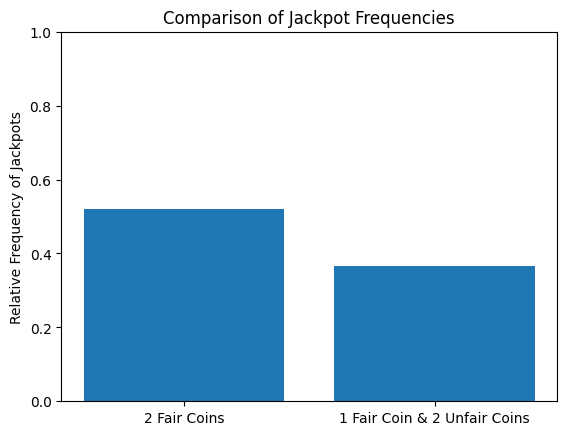

In [9]:
plt.bar(['2 Fair Coins', '1 Fair Coin & 2 Unfair Coins'], [(analyzer1.jackpot() / len(game1._play_results)), (analyzer2.jackpot() / len(game2._play_results))])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.ylim(0, 1)
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
die1.change_weight(6, 5)
die1.show()

,weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_weight(1, 5)
die2.show()

,weights
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1).
- Play method called properly (1).

In [13]:
game3 = Game([die3, die3, die3, die3, die3])
game3.play(10000)
game3.show_results('narrow')

Die Number            
                     0  1  2  3  4
Roll Number                       
0                    1  3  3  2  1
1                    4  1  1  4  1
2                    2  6  4  4  6
3                    2  3  2  3  1
4                    4  4  5  5  4
...                ... .. .. .. ..
9995                 6  3  2  6  3
9996                 3  6  3  2  1
9997                 2  2  6  2  1
9998                 1  5  2  3  2
9999                 5  6  2  6  3

[10000 rows x 5 columns]

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1).
- Play method called properly (1).

In [14]:
game4 = Game([die1, die2, die3, die3, die3])
game4.play(10000)
game4.show_results('narrow')

Die Number            
                     0  1  2  3  4
Roll Number                       
0                    5  4  6  6  3
1                    2  5  2  6  5
2                    5  1  1  1  1
3                    2  1  3  1  1
4                    3  3  6  1  2
...                ... .. .. .. ..
9995                 1  3  5  6  3
9996                 5  4  5  3  5
9997                 6  1  3  1  3
9998                 2  1  5  2  3
9999                 5  6  5  4  5

[10000 rows x 5 columns]

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Jackpots in Game 3: 9
Jackpots in Game 4: 6
Relative frequency of jackpots in Game 3: 0.0009
Relative frequency of jackpots in Game 4: 0.0006


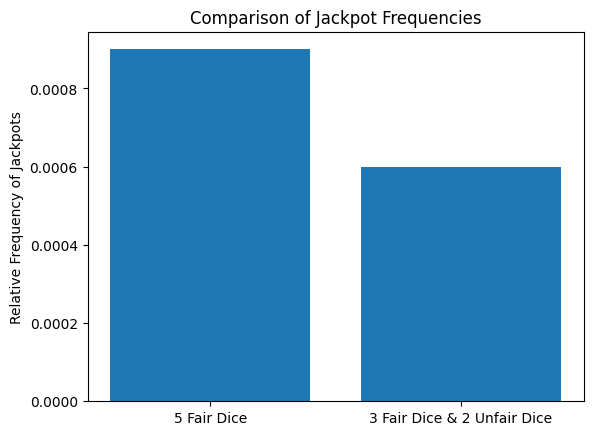

In [15]:
analyzer3 = Analyzer(game3)
analyzer4 = Analyzer(game4)

print(f"Jackpots in Game 3: {analyzer3.jackpot()}")
print(f"Jackpots in Game 4: {analyzer4.jackpot()}")
print(f"Relative frequency of jackpots in Game 3: {analyzer3.jackpot() / len(game3._play_results)}")
print(f"Relative frequency of jackpots in Game 4: {analyzer4.jackpot() / len(game4._play_results)}")

plt.bar(['5 Fair Dice', '3 Fair Dice & 2 Unfair Dice'], [(analyzer3.jackpot() / len(game3._play_results)), (analyzer4.jackpot() / len(game4._play_results))])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [16]:
df = pd.read_csv('english_letters.txt', sep='\s+', header=None) # 1st col is letters, 2nd col is weights
letter_die = Die(np.array(df[0]))
for i in range(len(df)):
    letter_die.change_weight(df.iloc[i, 0], float(df.iloc[i, 1]))
letter_die.show()

,weights
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [17]:
letter_game1 = Game([letter_die, letter_die, letter_die, letter_die])
letter_game1.play(1000)
letter_game1.show_results('narrow')

Die Number         
                     0  1  2  3
Roll Number                    
0                    E  T  J  E
1                    T  M  E  H
2                    D  E  W  S
3                    E  H  R  I
4                    I  D  M  R
...                ... .. .. ..
995                  S  A  E  E
996                  A  T  Y  A
997                  I  I  S  I
998                  A  M  T  R
999                  O  A  T  C

[1000 rows x 4 columns]

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [18]:
# Permutation DataFrame
letter_analyzer1 = Analyzer(letter_game1)
perms1 = letter_analyzer1.perm_count()

# Finding permutations that are words
vocab = pd.read_csv('scrabble_words.txt', header=None)
perms_results1 = [''.join(tup) for tup in perms1.index] # MultiIndex into strings
vocab_words = set(vocab[0].astype(str).str.upper()) # Column intro strings
matching_words1 = [word for word in perms_results1 if word in vocab_words] # List of found words

print(f"Number of permutations from 4-dice game that are English words: {len(matching_words1)}")

Number of permutations from 4-dice game that are English words: 52


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [19]:
# 5-dice Game and permutation DataFrame
letter_game2 = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
letter_game2.play(1000)
letter_analyzer2 = Analyzer(letter_game2)
perms2 = letter_analyzer2.perm_count()
perms_results2 = [''.join(tup) for tup in perms2.index] # MultiIndex into strings
matching_words2 = [word for word in perms_results2 if word in vocab_words] # List of found words

print(f"Number of permutations from 5-dice game that are English words: {len(matching_words2)}")

# Identifies game with more words
if len(matching_words1) > len(matching_words2):
    print("The 4-dice game produced more words than the 5-dice game.")
elif len(matching_words2) > len(matching_words1):
    print("The 5-dice game produced more words than the 4-dice game.")
else:
    print("The 4-dice game and 5-dice game produced the same number of words.")

Number of permutations from 5-dice game that are English words: 8
The 4-dice game produced more words than the 5-dice game.
